In [ ]:
from google.colab import files
upload = files.upload()

Saving train_FD001.txt to train_FD001.txt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the Data

In [ ]:
# Using pandas to read a CSV file from the specified path.
df = pd.read_csv("/content/drive/MyDrive/semhack/train_FD001.txt", delimiter=" ", header = None)
# Dropping columns from the dataframe that contain only NaN values.
df = df.dropna(axis=1, how='all')

Extra spaces at the end of lines in the space-delimited text file caused `pd.read_csv()` to interpret them as additional columns, leading to columns filled entirely with NaN values.

<h2>Sensor Information</h2>
<table border="1" cellpadding="10">
    <thead>
        <tr>
            <th>Symbol</th>
            <th>Description</th>
            <th>Units</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>T2</td>
            <td>Total temperature at fan inlet</td>
            <td>°R</td>
        </tr>
        <tr>
            <td>T24</td>
            <td>Total temperature at LPC outlet</td>
            <td>°R</td>
        </tr>
        <tr>
            <td>T30</td>
            <td>Total temperature at HPC outlet</td>
            <td>°R</td>
        </tr>
        <tr>
            <td>T50</td>
            <td>Total temperature at LPT outlet</td>
            <td>°R</td>
        </tr>
        <tr>
            <td>P2</td>
            <td>Pressure at fan inlet</td>
            <td>psia</td>
        </tr>
        <tr>
            <td>P15</td>
            <td>Total pressure in bypass-duct</td>
            <td>psia</td>
        </tr>
        <tr>
            <td>P30</td>
            <td>Total pressure at HPC outlet</td>
            <td>psia</td>
        </tr>
        <tr>
            <td>Nf</td>
            <td>Physical fan speed</td>
            <td>rpm</td>
        </tr>
        <tr>
            <td>Nc</td>
            <td>Physical core speed</td>
            <td>rpm</td>
        </tr>
        <tr>
            <td>epr</td>
            <td>Engine pressure ratio (P50/P2)</td>
            <td>--</td>
        </tr>
        <tr>
            <td>Ps30</td>
            <td>Static pressure at HPC outlet</td>
            <td>psia</td>
        </tr>
        <tr>
            <td>phi</td>
            <td>Ratio of fuel flow to Ps30</td>
            <td>pps/psi</td>
        </tr>
        <tr>
            <td>NRf</td>
            <td>Corrected fan speed</td>
            <td>rpm</td>
        </tr>
        <tr>
            <td>NRc</td>
            <td>Corrected core speed</td>
            <td>rpm</td>
        </tr>
        <tr>
            <td>BPR</td>
            <td>Bypass Ratio</td>
            <td>--</td>
        </tr>
        <tr>
            <td>farB</td>
            <td>Burner fuel-air ratio</td>
            <td>--</td>
        </tr>
        <tr>
            <td>htBleed</td>
            <td>Bleed Enthalpy</td>
            <td>--</td>
        </tr>
        <tr>
            <td>Nf_dmd</td>
            <td>Demanded fan speed</td>
            <td>rpm</td>
        </tr>
        <tr>
            <td>PCNfR_dmd</td>
            <td>Demanded corrected fan speed</td>
            <td>rpm</td>
        </tr>
        <tr>
            <td>W31</td>
            <td>HPT coolant bleed</td>
            <td>lbm/s</td>
        </tr>
        <tr>
            <td>W32</td>
            <td>LPT coolant bleed</td>
            <td>lbm/s</td>
        </tr>
    </tbody>
</table>

In [ ]:
df.columns = ["Unit Number", "Time", "OS1", "OS2", "OS3",
              "T2", "T24", "T30", "T50", "P2",
              "P15", "P30", "Nf", "Nc", "epr",
              "Ps30", "phi", "NRf", "NRc",
              "BPR", "farB", "htBleed", "Nf_dmd",
              "PCNfR_dmd", "W31", "W32"]

# Setting the pandas display option to show all columns when printing the dataframe.
# This isto ensure all columns are visible when displayed.
pd.set_option("display.max_columns", None)

# Displaying the first five rows of the dataframe to verify the changes.
df.head()

,Unit Number,Time,OS1,OS2,OS3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


Dataset: FD001, Operating Conditions: 1, Fault Modes: 1, Train Size: 1<br>
Engines run to failure in training dataset.

# Data Manipulation

In [ ]:
index_names = ['Unit Number', 'Time']
setting_names = ['OS1', 'OS2', 'OS3']
sensor_names = ["T2", "T24", "T30", "T50", "P2", "P15", "P30", "Nf", "Nc", "epr",
                "Ps30", "phi", "NRf", "NRc", "BPR", "farB", "htBleed", "Nf_dmd",
                "PCNfR_dmd", "W31", "W32"]

# Exploratory Data Analysis

## Descriptive Stastistics

In [ ]:
df[index_names].groupby('Unit Number').max().describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,100.0,206.31,46.342749,128.0,177.0,199.0,229.25,362.0


In [ ]:
df[setting_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OS1,20631.0,-0.000009,0.002187,-0.0087,-0.0015,0.0,0.0015,0.0087
OS2,20631.0,0.000002,0.000293,-0.0006,-0.0002,0.0,0.0003,0.0006
OS3,20631.0,100.000000,0.000000,100.0000,100.0000,100.0,100.0000,100.0000


In [ ]:
df[sensor_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T2,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
T24,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
T30,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
T50,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
P2,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
P15,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
P30,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
Nf,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
Nc,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
epr,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


## RUL - Remaining Useful Life

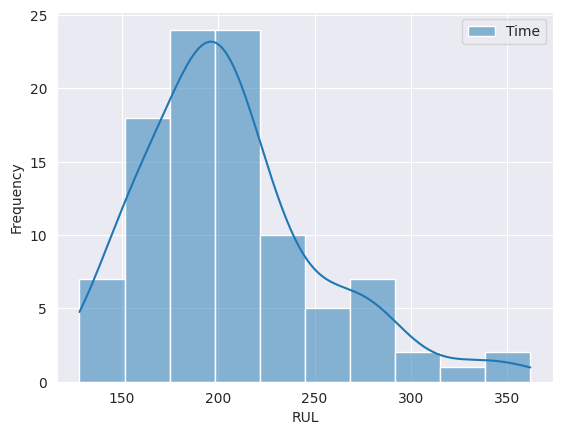

In [ ]:
import seaborn as sns

sns.set_style("darkgrid")

data = df[index_names].groupby('Unit Number').max()
sns.histplot(data, bins=10, kde=True, color='blue', alpha=0.5)

plt.xlabel("RUL")
plt.ylabel("Frequency")
plt.show()

We can see most engines break down around 200 cycles and few last over 300 cycles.

## Sensor Readings

For each engine unit, the maximum operating time (or the last recorded time, which we interpret as the end of its life) is determined. The RUL for each data point is then calculated as the difference between this maximum time and the current operating time for the engine at that point. In essence, for every time step of each unit, the RUL tells us how many more cycles the engine has before it reaches the end of its recorded life. This RUL is then added as a new column in the original dataframe.

In [ ]:
RUL = []
Life = df[index_names].groupby('Unit Number').max()['Time'].to_list()
for i in range(0, len(Life)):
    RUL.extend(Life[i] - df[df["Unit Number"] == i + 1]['Time'])
df.insert(2, 'RUL', RUL)

In [ ]:
df.head()

,Unit Number,Time,RUL,OS1,OS2,OS3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,191,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,190,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,189,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,188,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,187,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


Viewing the dataset after adding another column - RUL

In [ ]:
conColumns = ["T2", "P2", "epr", "farB", "Nf_dmd", "PCNfR_dmd"]
incCol = ["T24", "T30", "T50", "Nf", "Ps30", "NRf", "BPR", "htBleed"]
decCol = ["P30", "phi", "W31", "W32"]
dropCol = ["P15"]
noiseCol = ["Nc", "NRc"]

<h2>Constant Sensor Values</h2>
<table border="1" cellpadding="10">
    <thead>
        <tr>
            <th>Symbol</th>
            <th>Description</th>
            <th>Units</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>T2</td>
            <td>Total temperature at fan inlet</td>
            <td>°R</td>
        </tr>
        <tr>
            <td>P2</td>
            <td>Pressure at fan inlet</td>
            <td>psia</td>
        </tr>
        <tr>
            <td>epr</td>
            <td>Engine pressure ratio (P50/P2)</td>
            <td>--</td>
        </tr>
        <tr>
            <td>farB</td>
            <td>Burner fuel-air ratio</td>
            <td>--</td>
        </tr>
        <tr>
            <td>Nf_dmd</td>
            <td>Demanded fan speed</td>
            <td>rpm</td>
        </tr>
        <tr>
            <td>PCNfR_dmd</td>
            <td>Demanded corrected fan speed</td>
            <td>rpm</td>
        </tr>
    </tbody>
</table>

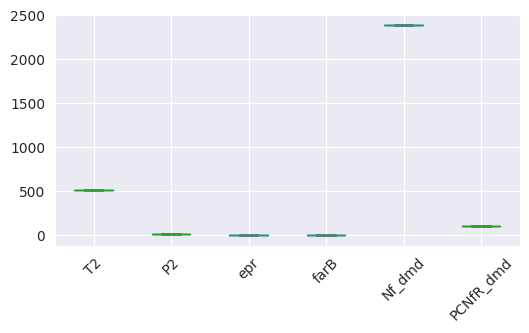

In [ ]:
df[conColumns].boxplot(figsize=(6, 3))
plt.xticks(rotation=45)
plt.show()

In [ ]:
def plotSensors(columns, EngNos=None, start=None, count=None, df=df):

    def plot_sensor_data(ax, sensor, units):
        for unit in units:
            y = df[df['Unit Number'] == unit][sensor]
            x = df[df['Unit Number'] == unit]['RUL']
            ax.plot(x, y)
        ax.set_xlim(300, -10)
        ax.set_ylabel(sensor)
        ax.set_xlabel("Remaining Useful Life")
        ax.set_title(f'{sensor} Vs RUL')

    # Decide on units to iterate over based on provided arguments
    if EngNos is None:
        units = np.arange(start, start+count) + 1
    else:
        units = EngNos

    # Handle single or multiple column plotting
    if len(columns) > 1:
        fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 3 * len(columns)))
        for ax, sensor in zip(axes, columns):
            plot_sensor_data(ax, sensor, units)
    else:
        fig, ax = plt.subplots(figsize=(10, 3))
        plot_sensor_data(ax, columns[0], units)

    plt.tight_layout()
    plt.show()

<h2>Increasing Sensor Values</h2>
<table border="1">
    <thead>
        <tr>
            <th>Sensor Name</th>
            <th>Description</th>
            <th>Units</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>T24</td>
            <td>Total temperature at LPC outlet</td>
            <td>°R</td>
        </tr>
        <tr>
            <td>T30</td>
            <td>Total temperature at HPC outlet</td>
            <td>°R</td>
        </tr>
        <tr>
            <td>T50</td>
            <td>Total temperature at LPT outlet</td>
            <td>°R</td>
        </tr>
        <tr>
            <td>Nf</td>
            <td>Physical fan speed</td>
            <td>rpm</td>
        </tr>
        <tr>
            <td>Ps30</td>
            <td>Static pressure at HPC outlet</td>
            <td>psia</td>
        </tr>
        <tr>
            <td>NRf</td>
            <td>Corrected fan speed</td>
            <td>rpm</td>
        </tr>
        <tr>
            <td>BPR</td>
            <td>Bypass Ratio</td>
            <td>--</td>
        </tr>
        <tr>
            <td>htBleed</td>
            <td>Bleed Enthalpy</td>
            <td>--</td>
        </tr>
    </tbody>
</table>

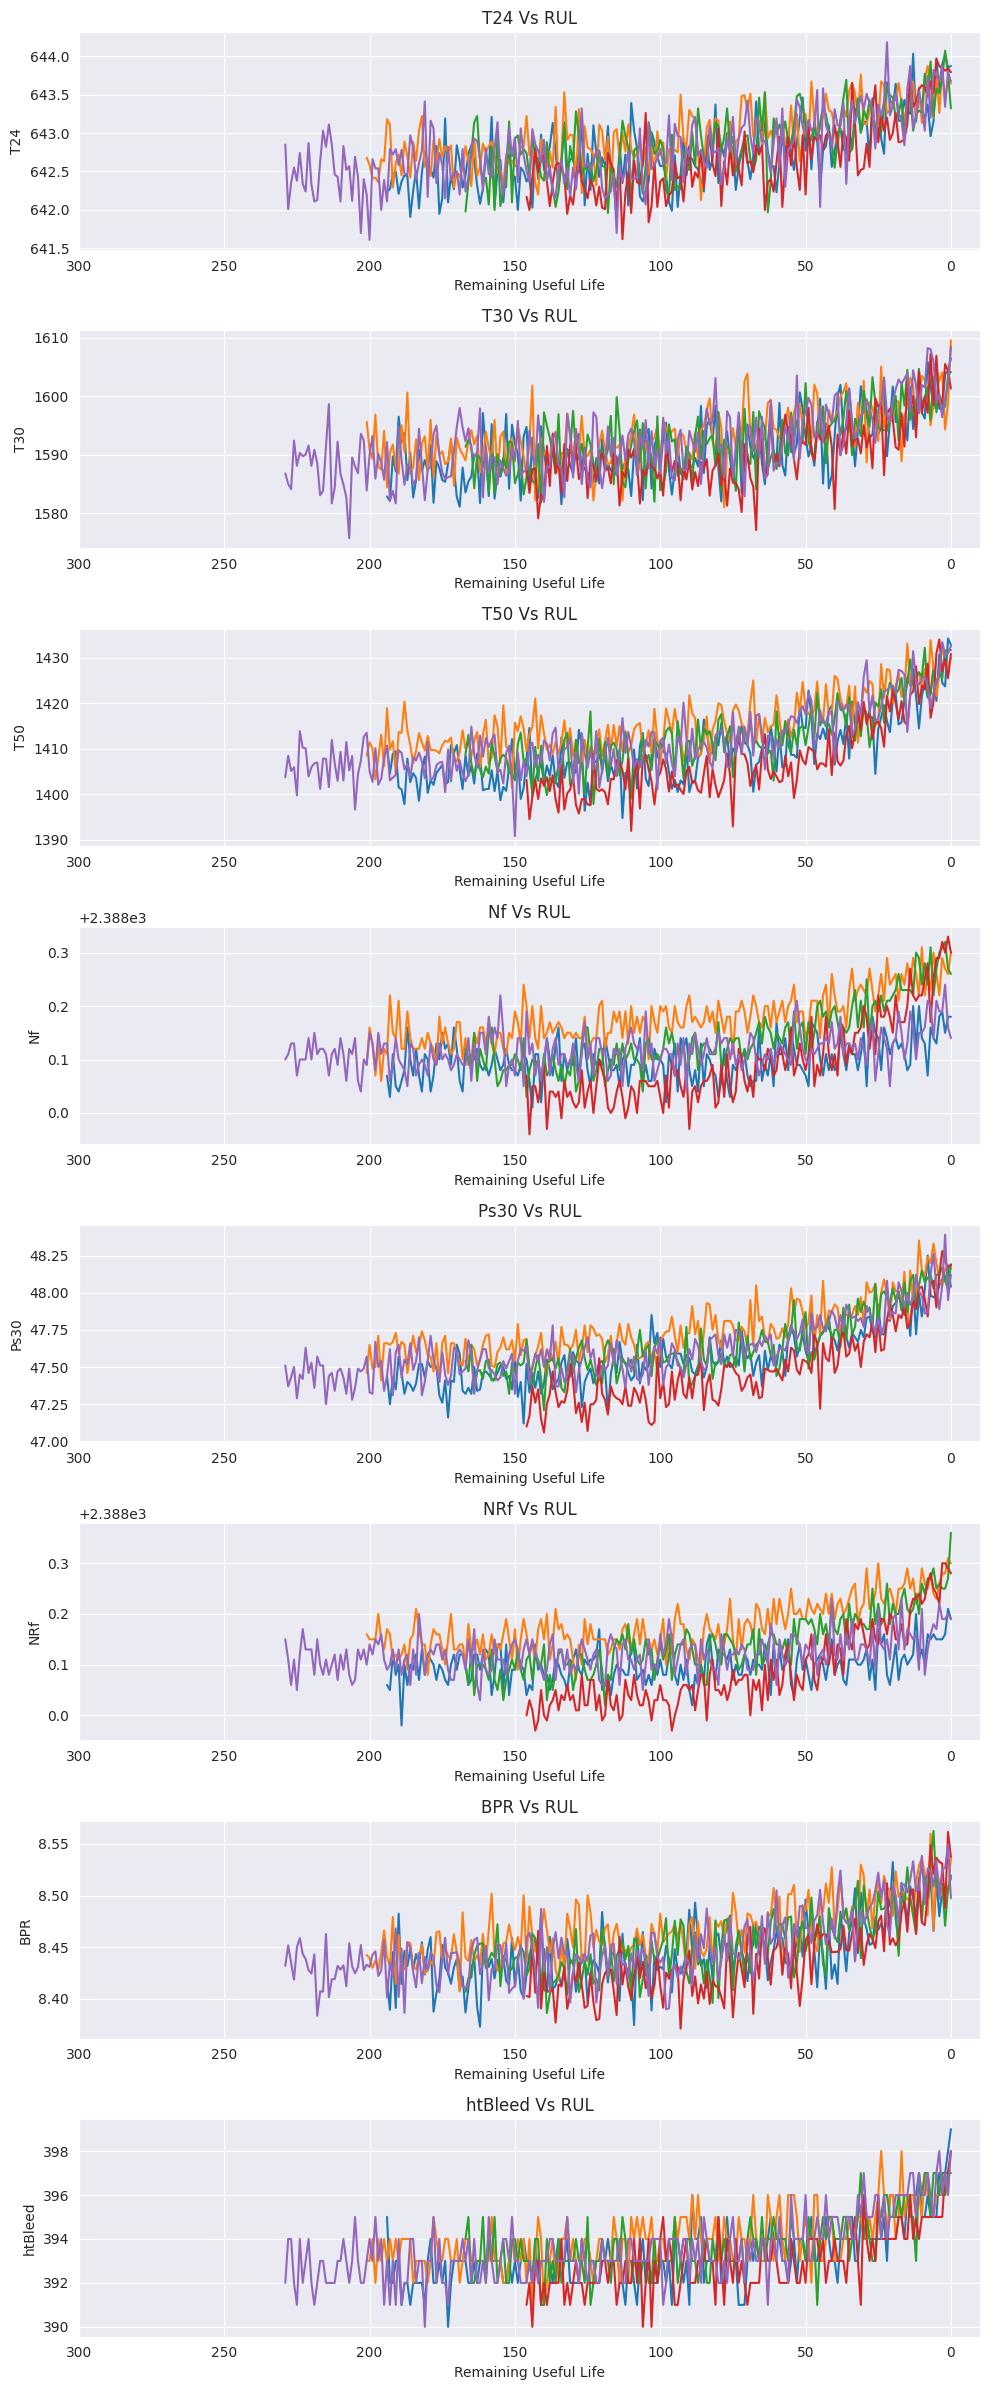

In [ ]:
plotSensors(incCol, start=20, count=5)

<h2>Decreasing Sensor Values</h2>
<table border="1">
    <thead>
        <tr>
            <th>Sensor Name</th>
            <th>Description</th>
            <th>Units</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>P30</td>
            <td>Total pressure at HPC outlet</td>
            <td>psia</td>
        </tr>
        <tr>
            <td>phi</td>
            <td>Ratio of fuel flow to Ps30</td>
            <td>pps/psi</td>
        </tr>
        <tr>
            <td>W31</td>
            <td>HPT coolant bleed</td>
            <td>lbm/s</td>
        </tr>
        <tr>
            <td>W32</td>
            <td>LPT coolant bleed</td>
            <td>lbm/s</td>
        </tr>
    </tbody>
</table>

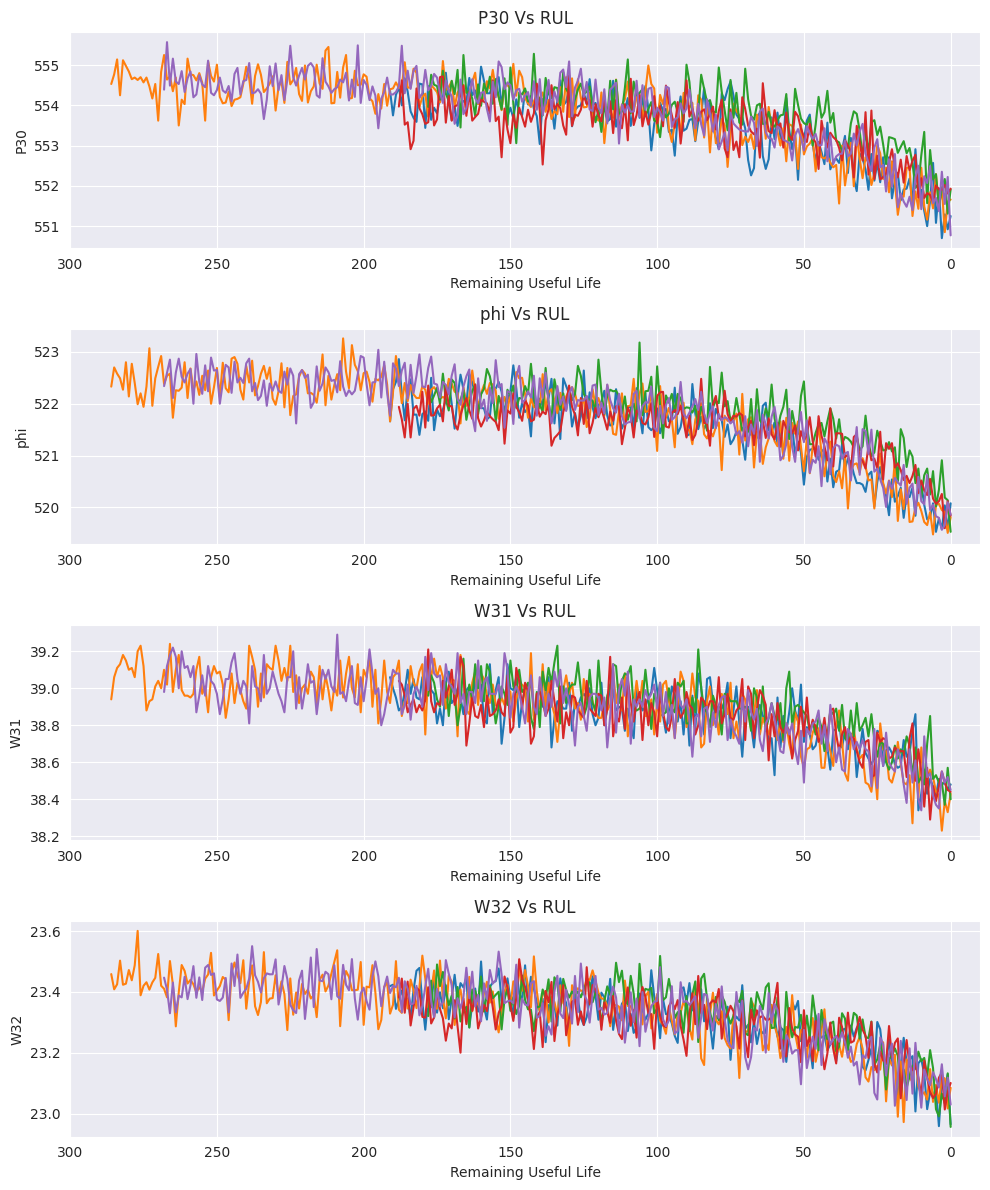

In [ ]:
plotSensors(decCol, start=0, count=5)

<h2>Sudden drops in Sensors</h2>
<table border="1">
    <thead>
        <tr>
            <th>Sensor Name</th>
            <th>Description</th>
            <th>Units</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>P15</td>
            <td>Total pressure in bypass-duct</td>
            <td>psia</td>
        </tr>
    </tbody>
</table>


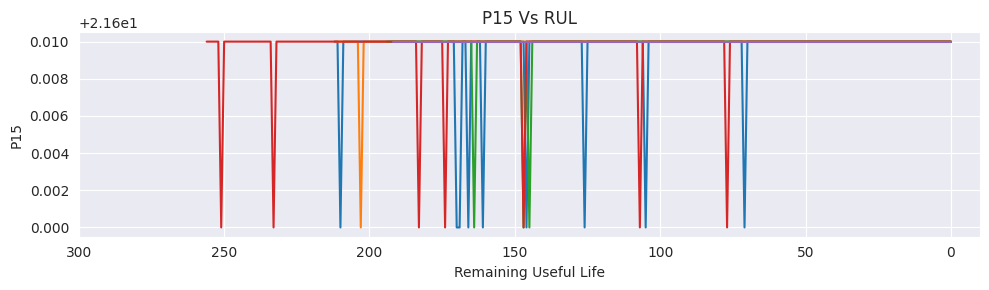

In [ ]:
plotSensors(dropCol, start=50, count=5)

<h2>Differential Trends in Sensors</h2>
<table border="1">
    <thead>
        <tr>
            <th>Sensor Name</th>
            <th>Description</th>
            <th>Units</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Nc</td>
            <td>Physical core speed</td>
            <td>rpm</td>
        </tr>
        <tr>
            <td>NRc</td>
            <td>Corrected core speed</td>
            <td>rpm</td>
        </tr>
    </tbody>
</table>

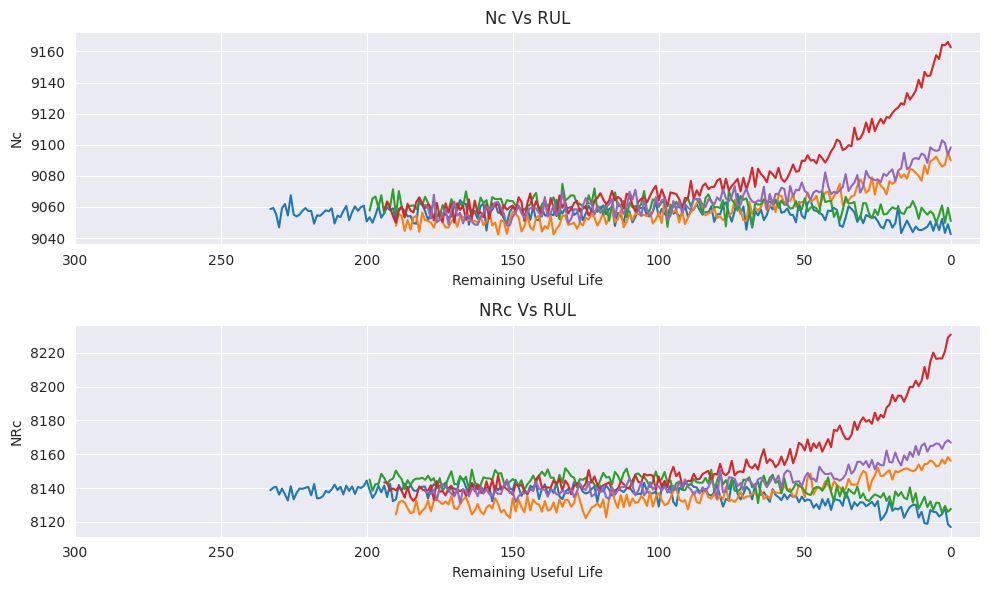

In [ ]:
plotSensors(noiseCol, start=30, count=5)

In [ ]:
!pip install pymannkendall

## Why the differential Pattern in Nc and NRc?

In [ ]:
import pymannkendall as mk

EngNos = len(df['Unit Number'].unique())

def analyze_trend(sensor_name):
    increasing_engines = []
    decreasing_engines = []
    no_trend_engines = []

    for i in range(1, EngNos+1):
        result = mk.original_test(df[df['Unit Number'] == i][sensor_name])
        t = result.trend
        if t == 'decreasing':
            decreasing_engines.append(i)
        elif t == 'increasing':
            increasing_engines.append(i)
        elif t == 'no trend':
            no_trend_engines.append(i)

    return increasing_engines, decreasing_engines, no_trend_engines

incNRc, decNRc, noTNRc = analyze_trend("NRc")
incNc, decNc, noTNc = analyze_trend("Nc")

In [ ]:
incSensors = ["T24", "T30", "T50", "Ps30", "BPR", "htBleed"]
correlation_matrix_incFull = df[incSensors + noiseCol].corr()
correlation_matrix_incNc = df[df['Unit Number'].isin(incNc)][incSensors + ["Nc"]].corr()
correlation_matrix_incNRc = df[df['Unit Number'].isin(incNRc)][incSensors + ["NRc"]].corr()

correlations_Nc_incFull = correlation_matrix_incFull["Nc"][incSensors].tolist()
correlations_NRc_incFull = correlation_matrix_incFull["NRc"][incSensors].tolist()
correlations_Nc_incNc = correlation_matrix_incNc["Nc"][incSensors].tolist()
correlations_NRc_incNRc = correlation_matrix_incNRc["NRc"][incSensors].tolist()

In [ ]:
correlation_matrix_decFull = df[decCol + noiseCol].corr()
correlation_matrix_decNc = df[df['Unit Number'].isin(decNc)][decCol + ["Nc"]].corr()
correlation_matrix_decNRc = df[df['Unit Number'].isin(decNRc)][decCol + ["NRc"]].corr()

correlations_Nc_decFull = correlation_matrix_decFull["Nc"][decCol].tolist()
correlations_NRc_decFull = correlation_matrix_decFull["NRc"][decCol].tolist()
correlations_Nc_decNc = correlation_matrix_decNc["Nc"][decCol].tolist()
correlations_NRc_decNRc = correlation_matrix_decNRc["NRc"][decCol].tolist()

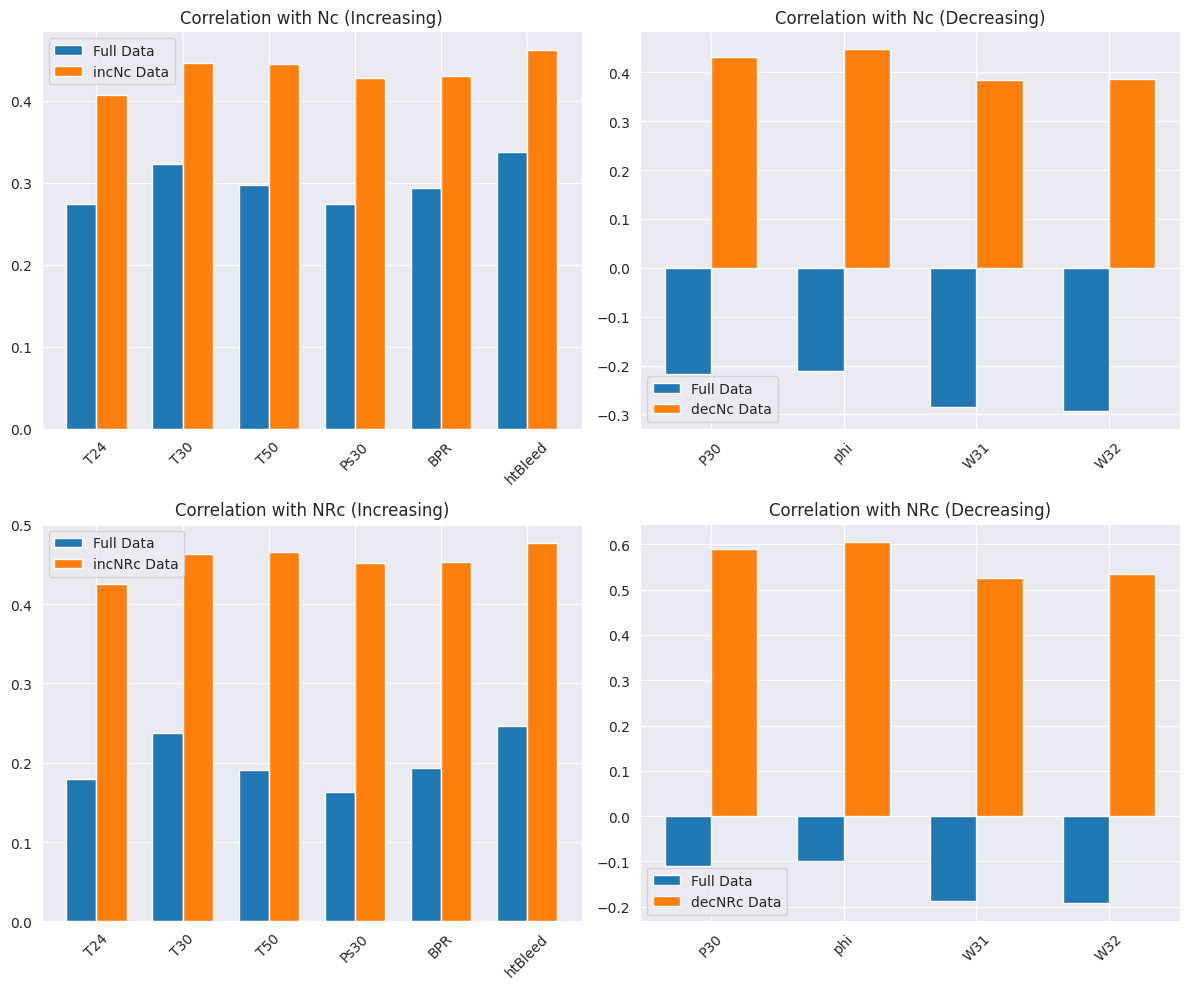

In [ ]:
# Plotting
x = np.arange(len(incSensors))
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plotting for Nc increasing
ax[0, 0].bar(x - width/2, correlations_Nc_incFull, width, label='Full Data')
ax[0, 0].bar(x + width/2, correlations_Nc_incNc, width, label='incNc Data')
ax[0, 0].set_title('Correlation with Nc (Increasing)')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(incSensors, rotation=45)
ax[0, 0].legend()

# Plotting for Nc decreasing
x_dec = np.arange(len(decCol))
ax[0, 1].bar(x_dec - width/2, correlations_Nc_decFull, width, label='Full Data')
ax[0, 1].bar(x_dec + width/2, correlations_Nc_decNc, width, label='decNc Data')
ax[0, 1].set_title('Correlation with Nc (Decreasing)')
ax[0, 1].set_xticks(x_dec)
ax[0, 1].set_xticklabels(decCol, rotation=45)
ax[0, 1].legend()

# Plotting for NRc increasing
ax[1, 0].bar(x - width/2, correlations_NRc_incFull, width, label='Full Data')
ax[1, 0].bar(x + width/2, correlations_NRc_incNRc, width, label='incNRc Data')
ax[1, 0].set_title('Correlation with NRc (Increasing)')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(incSensors, rotation=45)
ax[1, 0].legend()

# Plotting for NRc decreasing
ax[1, 1].bar(x_dec - width/2, correlations_NRc_decFull, width, label='Full Data')
ax[1, 1].bar(x_dec + width/2, correlations_NRc_decNRc, width, label='decNRc Data')
ax[1, 1].set_title('Correlation with NRc (Decreasing)')
ax[1, 1].set_xticks(x_dec)
ax[1, 1].set_xticklabels(decCol, rotation=45)
ax[1, 1].legend()

plt.tight_layout()
plt.show()

The bar charts make it clear which sensors have a heightened correlation with Nc or NRc based on their increasing or decreasing behavior.</br>
The differentiation between the Full Data set and the targeted subsets (incNc, decNc, incNRc, decNRc) is vital as it highlights the specific conditions under which the correlations become more prominent.

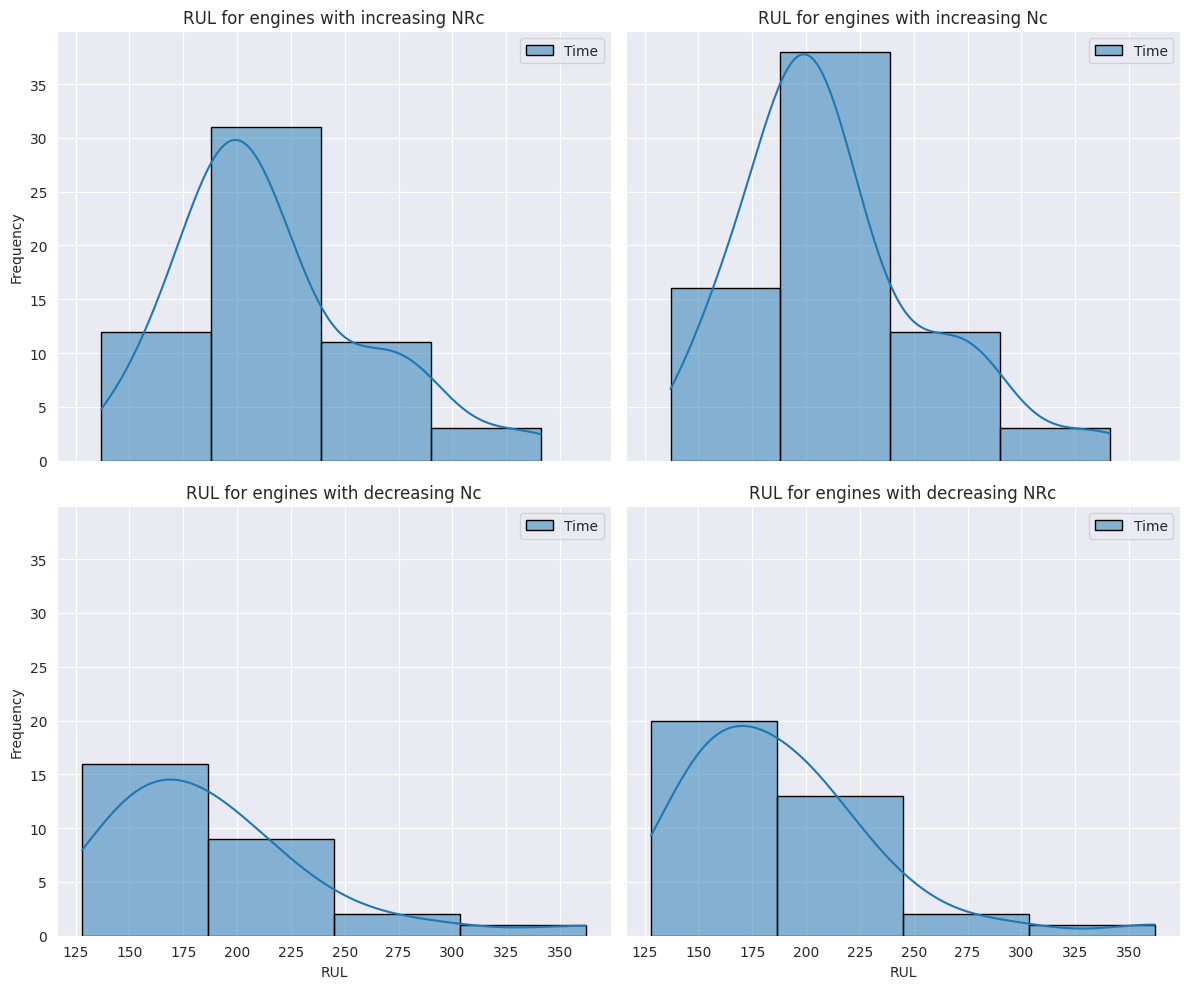

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)

# RUL for engines where NRc is increasing
data_incNRc = df[df['Unit Number'].isin(incNRc)][index_names].groupby('Unit Number').max()
sns.histplot(data=data_incNRc, ax=axs[0,0], bins=4, kde=True, color='skyblue', edgecolor='black')
axs[0,0].set_title('RUL for engines with increasing NRc')
axs[0,0].set_ylabel('Frequency')
axs[0,0].set_xticks(axs[1,0].get_xticks())
axs[0,0].set_xticklabels(axs[1,0].get_xticklabels())

# RUL for engines where Nc is increasing
data_incNc = df[df['Unit Number'].isin(incNc)][index_names].groupby('Unit Number').max()
sns.histplot(data=data_incNc, ax=axs[0,1], bins=4, kde=True, color='lightcoral', edgecolor='black')
axs[0,1].set_title('RUL for engines with increasing Nc')
axs[0,1].set_xticks(axs[1,1].get_xticks())
axs[0,1].set_xticklabels(axs[1,1].get_xticklabels())

# RUL for engines where Nc is decreasing
data_decNc = df[df['Unit Number'].isin(decNc)][index_names].groupby('Unit Number').max()
sns.histplot(data=data_decNc, ax=axs[1,0], bins=4, kde=True, color='mediumseagreen', edgecolor='black')
axs[1,0].set_title('RUL for engines with decreasing Nc')
axs[1,0].set_ylabel('Frequency')
axs[1,0].set_xlabel('RUL')

# RUL for engines where NRc is decreasing
data_decNRc = df[df['Unit Number'].isin(decNRc)][index_names].groupby('Unit Number').max()
sns.histplot(data=data_decNRc, ax=axs[1,1], bins=4, kde=True, color='mediumpurple', edgecolor='black')
axs[1,1].set_title('RUL for engines with decreasing NRc')
axs[1,1].set_xlabel('RUL')

plt.tight_layout()
plt.show()

Further analysis revealed that the majority of the decreasing trends in Nc and NRc were linked to an RUL less than 175, whereas the increasing trends often corresponded to an RUL around 225.

# XGBoost

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
upload = files.upload()

Saving test_FD001.txt to test_FD001.txt


In [ ]:

# Load test data
test_df = pd.read_csv("test_FD001.txt", delimiter=" ", header = None)
test_df = test_df.dropna(axis=1, how='all')

In [ ]:
test_df.columns = ["Unit Number", "Time", "OS1", "OS2", "OS3",
              "T2", "T24", "T30", "T50", "P2",
              "P15", "P30", "Nf", "Nc", "epr",
              "Ps30", "phi", "NRf", "NRc",
              "BPR", "farB", "htBleed", "Nf_dmd",
              "PCNfR_dmd", "W31", "W32"]

In [ ]:
test_df.head()

,Unit Number,Time,OS1,OS2,OS3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [ ]:
# Compute RUL for test data
max_time_per_unit_test = test_df.groupby('Unit Number')['Time'].max()
test_df['RUL'] = max_time_per_unit_test - test_df['Time']


In [ ]:
test_df = test_df.drop(['RUL'], axis=1)

In [ ]:
RUL = []
Life = test_df[index_names].groupby('Unit Number').max()['Time'].to_list()
for i in range(0, len(Life)):
    RUL.extend(Life[i] - test_df[test_df["Unit Number"] == i + 1]['Time'])
test_df.insert(2, 'RUL', RUL)

In [ ]:
# Features and target for training data
X_train = df.drop(['RUL', 'Unit Number', 'Time'], axis=1)
y_train = df['RUL']

# Features and target for test data
X_test = test_df.drop(['RUL', 'Unit Number', 'Time'], axis=1)
y_test = test_df['RUL']

# Standardize the features
scaler = StandardScaler().fit(X_train)  # Fit on training set only
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # Apply same transformation to test data


In [ ]:
model = xgb.XGBRegressor(
    objective ='reg:squarederror',
    colsample_bytree = 0.5,
    learning_rate = 0.01,
    max_depth = 26,
    alpha = 0.5,
    n_estimators = 200
)

model.fit(X_train, y_train)


XGBRegressor(alpha=0.5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=26, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
# Predict
y_pred = model.predict(X_test)

# Evaluate using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))


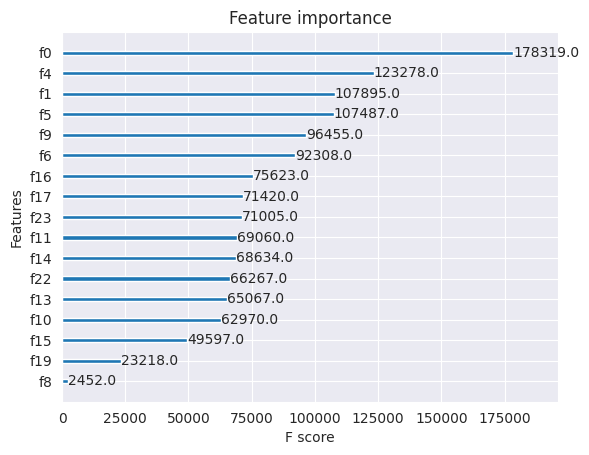

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.show()


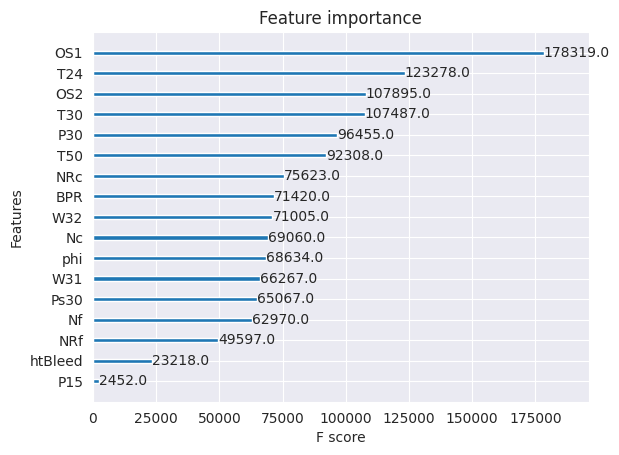

In [ ]:
import matplotlib.pyplot as plt

# Map the feature importance scores to the column names
mapper = {'f{0}'.format(i): v for i, v in enumerate(df.drop(['RUL', 'Unit Number', 'Time'], axis=1).columns)}
mapped_importance = {mapper[k]: v for k, v in model.get_booster().get_score(importance_type='weight').items()}

# Plot the adjusted feature importance
xgb.plot_importance(mapped_importance)
plt.show()

##TRAINING AFTER REMOVING FEATURES

In [ ]:
# Features and target for training data
X_train = df.drop(['RUL', 'Unit Number', 'Time','P15','htBleed','NRf','Nf'], axis=1)
y_train = df['RUL']

# Features and target for test data
X_test = test_df.drop(['RUL', 'Unit Number', 'Time','P15','htBleed','NRf','Nf'], axis=1)
y_test = test_df['RUL']

# Standardize the features
scaler = StandardScaler().fit(X_train)  # Fit on training set only
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # Apply same transformation to test data

In [ ]:
model = xgb.XGBRegressor(
    objective ='reg:squarederror',
    colsample_bytree = 0.5,
    learning_rate = 0.01,
    max_depth = 26,
    alpha = 0.5,
    n_estimators = 200
)

model.fit(X_train, y_train)

XGBRegressor(alpha=0.5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=26, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
# Predict
y_pred = model.predict(X_test)

# Evaluate using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 72.695302


## HYPERPARAMTER TUNING

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.7, 0.8, 0.9, 1],
}

# Set up GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Lowest RMSE found: {(-1*grid_search.best_score_)**(1/2)}")


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}
Lowest RMSE found: 43.07561394954054


## FEDERATED LEARNING

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming the data is already loaded in 'df'
features = df.drop(['RUL', 'Unit Number', 'Time'], axis=1)
labels = df['RUL']

# Split the dataset to simulate two nodes
features_node1, features_node2, labels_node1, labels_node2 = train_test_split(features, labels, test_size=0.5, random_state=42)

# Hyperparameters (these can be optimized further)
params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

def train_on_node(features, labels, params):
    model = xgb.XGBRegressor(**params)
    model.fit(features, labels)
    return model

def aggregate_predictions(models, features):
    predictions = []
    for model in models:
        predictions.append(model.predict(features))
    return np.mean(predictions, axis=0)

# FL Iterations
NUM_ROUNDS = 5
models_node1 = []
models_node2 = []

for round in range(NUM_ROUNDS):
    # Train on each node
    model_node1 = train_on_node(features_node1, labels_node1, params)
    model_node2 = train_on_node(features_node2, labels_node2, params)

    # Store models
    models_node1.append(model_node1)
    models_node2.append(model_node2)

    # Aggregate models by averaging predictions (on validation set or any other dataset)
    aggregated_preds_node1 = aggregate_predictions(models_node1 + models_node2, features_node1)
    aggregated_preds_node2 = aggregate_predictions(models_node1 + models_node2, features_node2)

    # Compute RMSE or any other metric for evaluation
    rmse_node1 = mean_squared_error(labels_node1, aggregated_preds_node1, squared=False)
    rmse_node2 = mean_squared_error(labels_node2, aggregated_preds_node2, squared=False)

    print(f"Round {round + 1} - RMSE Node 1: {rmse_node1}, RMSE Node 2: {rmse_node2}")



Round 1 - RMSE Node 1: 38.22937416745387, RMSE Node 2: 37.626157598831355
Round 2 - RMSE Node 1: 38.229374091869, RMSE Node 2: 37.62615757242412
Round 3 - RMSE Node 1: 38.229373904273245, RMSE Node 2: 37.626157450173885
Round 4 - RMSE Node 1: 38.229373991703895, RMSE Node 2: 37.626157629354644
Round 5 - RMSE Node 1: 38.22937404682707, RMSE Node 2: 37.62615748834904


In [ ]:
!pip install syft

In [ ]:
!pip install jax jaxlib


In [ ]:
'''import xgboost as xgb
import numpy as np
from syft.frameworks.torch.dp import pate
from sklearn.model_selection import train_test_split

# Assuming you have already loaded your dataset
features = df.drop(['RUL', 'Unit Number', 'Time'], axis=1)
labels = df['RUL']

# Split the dataset to simulate multiple teacher datasets (e.g., 10 teachers)
num_teachers = 10
teacher_data_splits = np.array_split(df, num_teachers)

teacher_models = []

for split in teacher_data_splits:
    X_teacher = split.drop(['RUL', 'Unit Number', 'Time'], axis=1)
    y_teacher = split['RUL']

    model = xgb.XGBRegressor()
    model.fit(X_teacher, y_teacher)
    teacher_models.append(model)

# Use teacher models to label a public unlabeled dataset
# (For demonstration, let's assume X_public is your public dataset)
X_public, _, _, _ = train_test_split(features, labels, test_size=0.2)
teacher_preds = np.stack([model.predict(X_public) for model in teacher_models], axis=0)

# For simplicity, we'll assume the true labels from the public dataset are the rounded mean of the teachers' predictions
public_labels = np.round(np.mean(teacher_preds, axis=0))

# PATE Analysis
data_dep_eps, data_ind_eps = pate.perform_analysis(teacher_preds=teacher_preds.T, indices=public_labels, noise_eps=0.1, delta=1e-5)
print(f"Data Independent Epsilon: {data_ind_eps}")
print(f"Data Dependent Epsilon: {data_dep_eps}")

# Train a student model on the public dataset using labels generated by teacher models
student_model = xgb.XGBRegressor()
student_model.fit(X_public, public_labels)
'''